In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [23]:
# reading image
img = cv2.imread('/home/jsheaffe/r2b2_project/r2b2-obj-detect/samples/gz_ball.jpg')

In [24]:
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [25]:
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


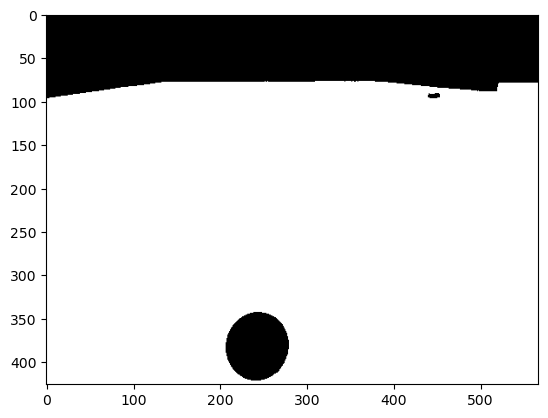

In [26]:
plt.imshow(threshold, cmap='gray')

In [27]:
# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [28]:
for contour in contours:
    print(contour.shape)

(95, 1, 2)
(114, 1, 2)
(17, 1, 2)


In [32]:
i = 0
bounding_rects = []
for contour in contours:

    # here we are ignoring first counter because
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # using drawContours() function
    # cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # # finding center point of shape
    # M = cv2.moments(contour)
    # if M['m00'] != 0.0:
    # 	x = int(M['m10']/M['m00'])
    # 	y = int(M['m01']/M['m00'])

    # # putting shape name at center of each shape
    # if len(approx) == 3:
    # 	cv2.putText(img, 'Triangle', (x, y),
    # 				cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # elif len(approx) == 4:
    # 	cv2.putText(img, 'Quadrilateral', (x, y),
    # 				cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # elif len(approx) == 5:
    # 	cv2.putText(img, 'Pentagon', (x, y),
    # 				cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # elif len(approx) == 6:
    # 	cv2.putText(img, 'Hexagon', (x, y),
    # 				cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # else:
    # 	cv2.putText(img, 'circle', (x, y),
    # 				cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    x, y, w, h = cv2.boundingRect(approx)
    # centers, radius[i] = cv.minEnclosingCircle(contours_poly[i])

    p1 = (x, y)
    p2 = (x + w, y + h)

    print(f'rect: {p1}, {p2}')
    cv2.rectangle(img, p1, p2, (0,255,0), 2)


rect: (206, 342), (281, 423)
rect: (439, 90), (455, 98)


In [30]:
bounding_rects

[]

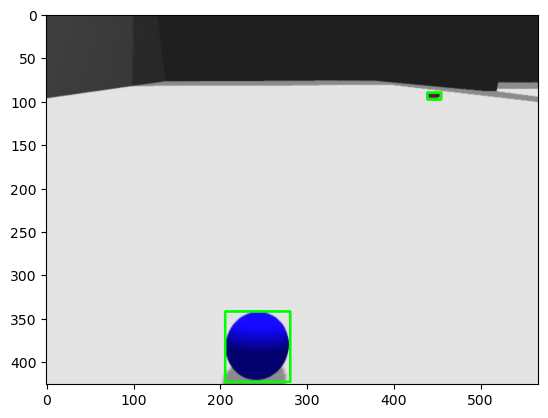

In [31]:
plt.imshow(img)